In [7]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt


In [21]:
data = pd.read_csv("house_prices.csv")

In [27]:
data.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [29]:
data.shape

(99499, 9)

In [33]:
data.groupby('property_type')['property_type'].agg('count')

property_type
Farm House          88
Flat             26658
House            58169
Lower Portion     5549
Penthouse          255
Room               241
Upper Portion     8539
Name: property_type, dtype: int64

In [35]:
data.groupby('city')['city'].agg('count')

city
Faisalabad     2231
Islamabad     22243
Karachi       37066
Lahore        26221
Rawalpindi    11738
Name: city, dtype: int64

In [37]:
data.groupby('purpose')['purpose'].agg('count')

purpose
For Rent    28552
For Sale    70947
Name: purpose, dtype: int64

In [41]:
data2 = data.drop(['Unnamed: 0','purpose','location'],axis= 'columns')

In [43]:
data2.head()

,property_type,price,city,baths,bedrooms,Area_in_Marla
0,Flat,10000000,Islamabad,2,2,4.0
1,Flat,6900000,Islamabad,3,3,5.6
2,House,16500000,Islamabad,6,5,8.0
3,House,43500000,Islamabad,4,4,40.0
4,House,7000000,Islamabad,3,3,8.0


In [45]:
data2.isnull().sum()

property_type    0
price            0
city             0
baths            0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [47]:
data2['bedrooms'].unique()

array([2, 3, 5, 4, 1, 6, 0], dtype=int64)

In [49]:
data2['baths'].unique()

array([2, 3, 6, 4, 5, 1, 7], dtype=int64)

In [69]:
filtered_data = data2.query('bedrooms > 5 and baths > 5')


In [73]:
filtered_data.shape

(5172, 6)

In [79]:
data2.query('bedrooms>5'and 'baths>5').shape

(13482, 6)

In [81]:
data2.Area_in_Marla.unique()

array([  4. ,   5.6,   8. ,  40. ,   6.2,  20. ,   7.1,  10. ,   3.1,
         5. ,   4.7,  12. ,   4.3,   6.7,   5.3,  24. ,  13.3,  16. ,
         9.3,  11. ,   7.5,   3. ,   2.5,   6. ,   9.7,  18. ,   7. ,
         3.8,   5.5,  22. ,   2.4,   4.4,   2.2,   8.9,   3.2,   9.6,
         9.8,  10.2,  11.4,   4.8,   7.6,  13.2,   5.2,   1.3,   6.1,
         9.1,  14. ,  11.5,   7.8,  30. ,   3.7,   4.2,   5.8,  26. ,
        10.1,  17. ,   2. ,   8.2,   1.5,  10.7,   6.9,   6.6,   2.9,
         3.6,   4.1,  16.4,  13. ,  12.2,   5.1,   9. ,   3.4,  10.3,
         4.9,  14.7,  32. ,   7.3,   8.1,   2.8,   3.3,  36. ,  12.5,
         1.9,  11.6,  76. ,  14.2,   6.4,   5.7,   1.8,  60. ,  12.4,
        11.8,   3.5,  38. ,  10.9,   2.7,   6.5,  15. ,   5.9,   8.7,
        10.4,  15.9,   6.3,   8.6,  19. ,   4.5,   5.4,   8.3,  17.3,
         1.6,   2.6,   1.7,   7.9,  11.1,   8.4,   4.6,   3.9,  11.2,
        13.7,  10.8,   0.4,   7.2,  11.7,  10.5,  17.8,  10.6,  15.6,
         8.5,  13.4,

check is there any no float numbers or number ranges

In [83]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [85]:
data2[~data2['Area_in_Marla'].apply(is_float)].head()

,property_type,price,city,baths,bedrooms,Area_in_Marla


Feature engineering and dimensioly reduction

In [163]:
data3 = data2.copy()
data3['price_per_area'] = data3['price']/data3['Area_in_Marla']
data3.head()

,property_type,price,city,baths,bedrooms,Area_in_Marla,price_per_area
0,Flat,10000000,Islamabad,2,2,4.0,2.500000e+06
1,Flat,6900000,Islamabad,3,3,5.6,1.232143e+06
2,House,16500000,Islamabad,6,5,8.0,2.062500e+06
3,House,43500000,Islamabad,4,4,40.0,1.087500e+06
4,House,7000000,Islamabad,3,3,8.0,8.750000e+05


In [165]:
len(data3.city.unique())

5

In [167]:
len(data3.property_type.unique())

7

In [169]:
data3[data3.Area_in_Marla/data3.bedrooms>6]

,property_type,price,city,baths,bedrooms,Area_in_Marla,price_per_area
3,House,43500000,Islamabad,4,4,40.0,1087500.0
23,House,600000,Islamabad,6,6,40.0,15000.0
25,House,45000,Islamabad,5,3,24.0,1875.0
97,Upper Portion,50000,Rawalpindi,3,3,20.0,2500.0
101,Upper Portion,48000,Rawalpindi,4,3,20.0,2400.0
...,...,...,...,...,...,...,...
99432,Upper Portion,55000,Islamabad,3,3,20.0,2750.0
99433,Upper Portion,50000,Islamabad,3,3,20.0,2500.0
99434,Upper Portion,55000,Islamabad,3,3,20.0,2750.0
99436,Upper Portion,40000,Islamabad,3,3,20.0,2000.0


In [171]:
data3.shape

(99499, 7)

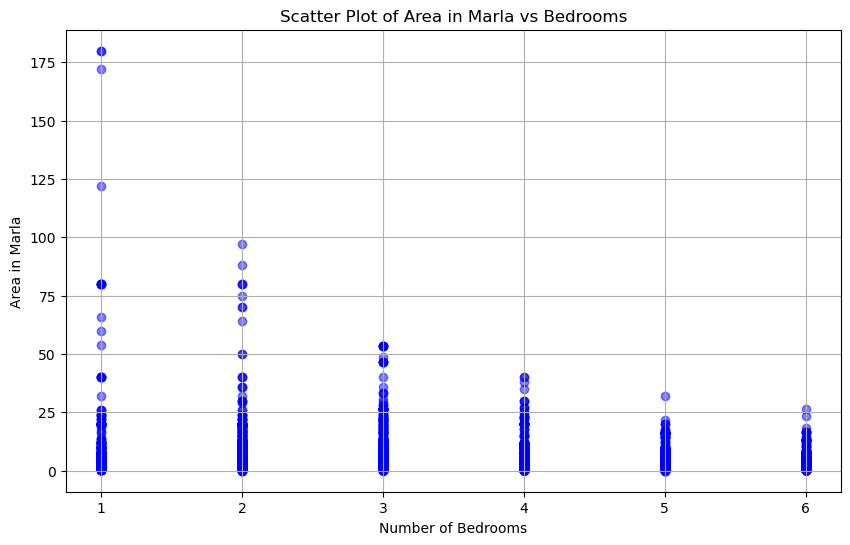

In [145]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data3['bedrooms'], data3['Area_in_Marla']/data3['bedrooms'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Area in Marla vs Bedrooms')
plt.ylabel('Area in Marla')
plt.xlabel('Number of Bedrooms')
plt.grid(True)
plt.show()

In [173]:
data4 = data3[~(data3.Area_in_Marla/data3.bedrooms>30)]

In [175]:
data4.shape

(99143, 7)

In [177]:
data4.price_per_area.describe()


count      99143.0
mean           inf
std            NaN
min          400.0
25%        11750.0
50%      1500000.0
75%      2180000.0
max            inf
Name: price_per_area, dtype: float64

In [181]:
data5 = data4[~(data4.Area_in_Marla==0)]

In [183]:
data5.shape

(99133, 7)

In [189]:
data5.price_per_area.describe()

count    9.913300e+04
mean     1.439156e+06
std      1.266167e+06
min      4.000000e+02
25%      1.175000e+04
50%      1.500000e+06
75%      2.180000e+06
max      4.250000e+07
Name: price_per_area, dtype: float64

In [191]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_area)
        st = np.std(subdf.price_per_area)
        reduced_df = subdf[(subdf.price_per_area>(m-st)) & (subdf.price_per_area>(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

data6 = remove_pps_outliers(data5)
data6.shape

(12258, 7)

In [205]:
data6.bedrooms.unique()

array([4, 5, 6, 3, 2, 1], dtype=int64)

In [207]:
data6.head()

,property_type,price,city,baths,bedrooms,Area_in_Marla,price_per_area
0,House,6000000,Faisalabad,2,4,2.5,2.400000e+06
1,House,7000000,Faisalabad,2,4,3.0,2.333333e+06
2,House,25000000,Faisalabad,5,4,10.0,2.500000e+06
3,House,40000000,Faisalabad,5,5,10.0,4.000000e+06
4,House,15000000,Faisalabad,5,6,4.0,3.750000e+06


Text(0, 0.5, 'Count')

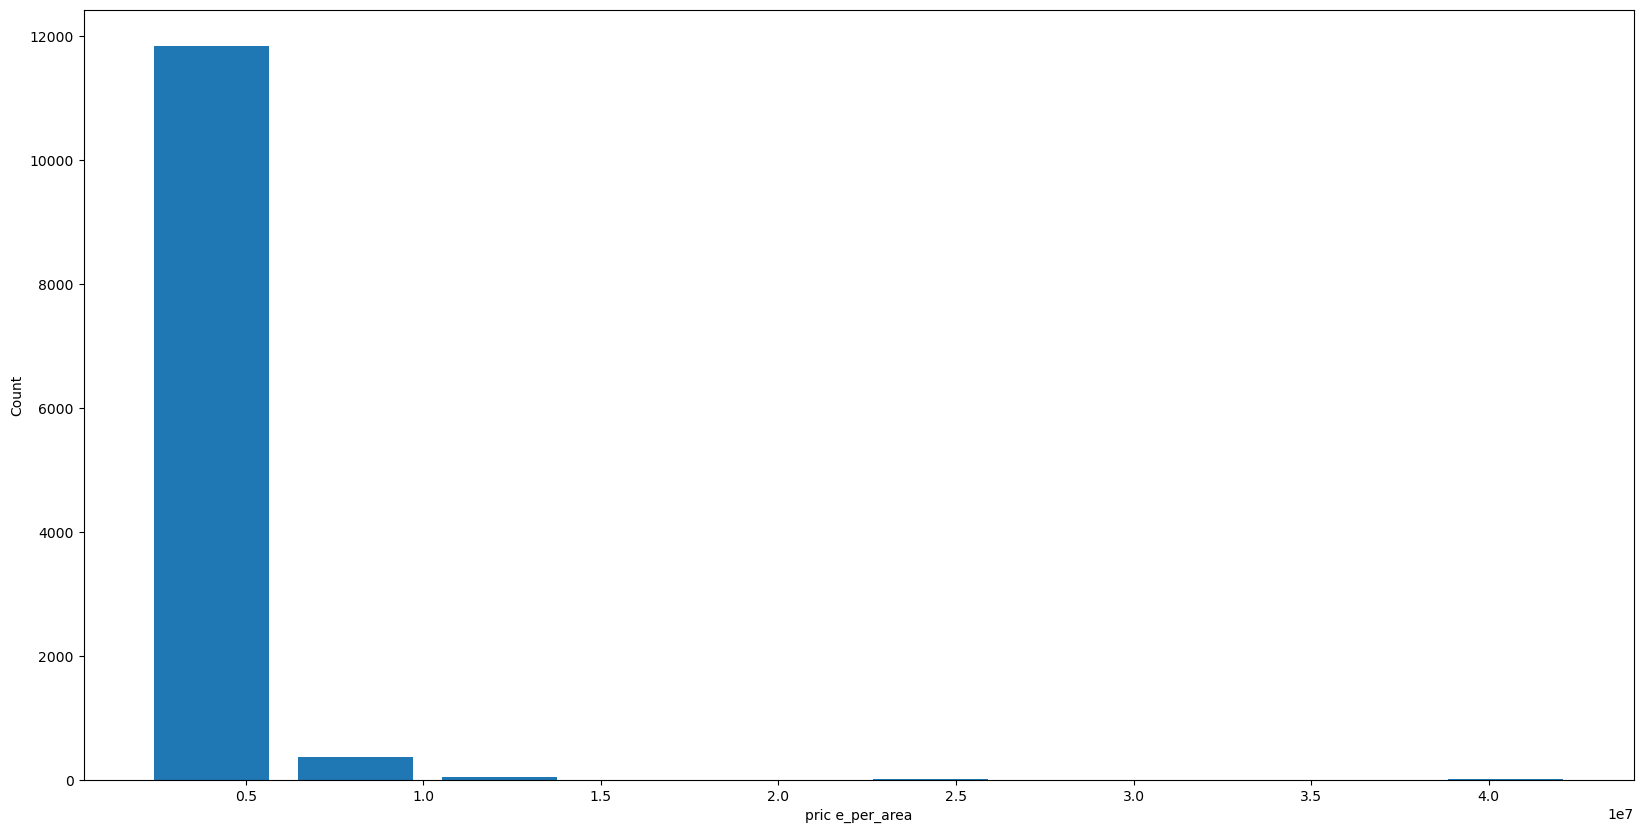

In [211]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data6.price_per_area,rwidth = 0.8)
plt.xlabel('pric e_per_area')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

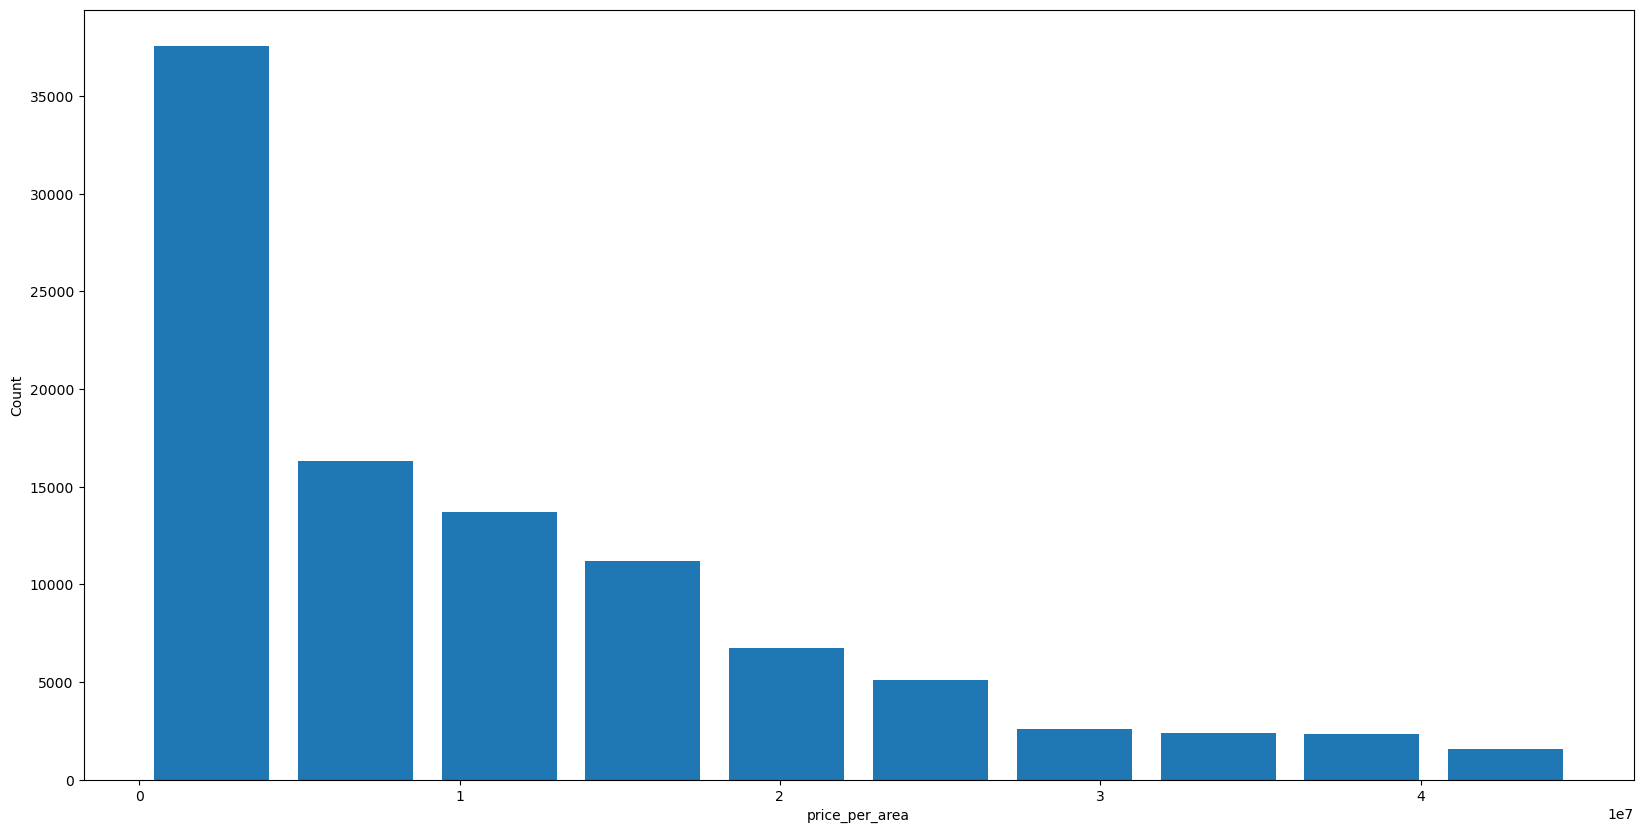

In [217]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data3.price,rwidth = 0.8)
plt.xlabel('price_per_area')
plt.ylabel('Count')

In [219]:
data6.baths.unique()

array([2, 5, 3, 6, 7, 4, 1], dtype=int64)

In [223]:
data6[data6.baths>5]

,property_type,price,city,baths,bedrooms,Area_in_Marla,price_per_area
7,House,33000000,Faisalabad,6,6,13.0,2.538462e+06
9,House,25000000,Faisalabad,7,5,7.0,3.571429e+06
10,House,25000000,Faisalabad,6,4,10.0,2.500000e+06
11,House,36500000,Faisalabad,7,6,13.0,2.807692e+06
17,House,11000000,Faisalabad,6,5,3.8,2.894737e+06
...,...,...,...,...,...,...,...
12249,House,15000000,Rawalpindi,7,5,7.0,2.142857e+06
12250,House,26000000,Rawalpindi,7,5,12.0,2.166667e+06
12251,House,14500000,Rawalpindi,7,5,7.0,2.071429e+06
12253,House,43500000,Rawalpindi,6,5,20.0,2.175000e+06


Text(0, 0.5, 'Count')

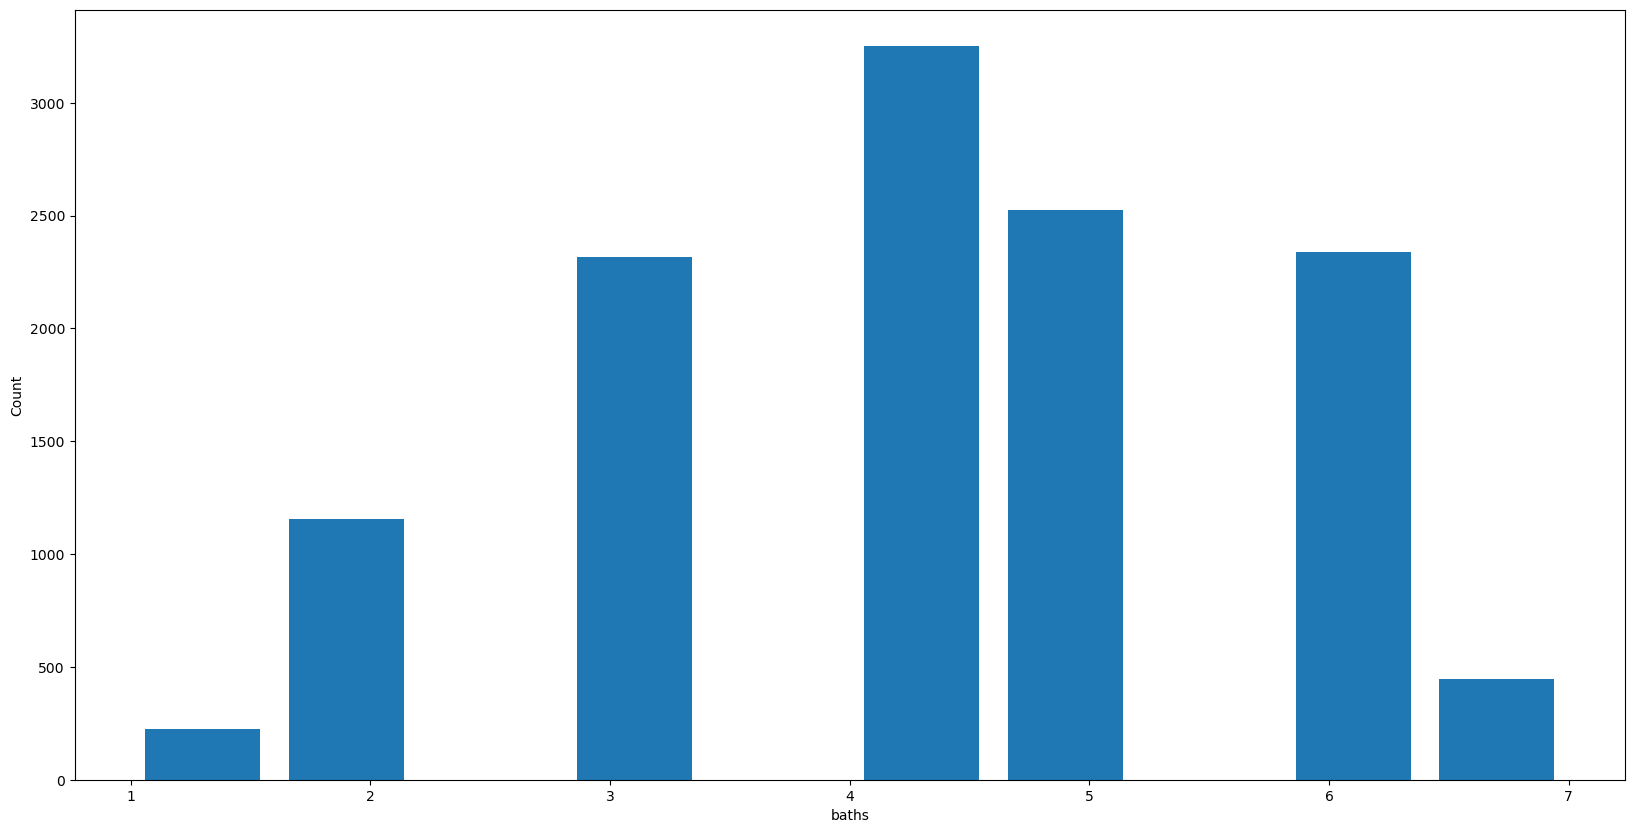

In [225]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data6.baths,rwidth = 0.8)
plt.xlabel('baths')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

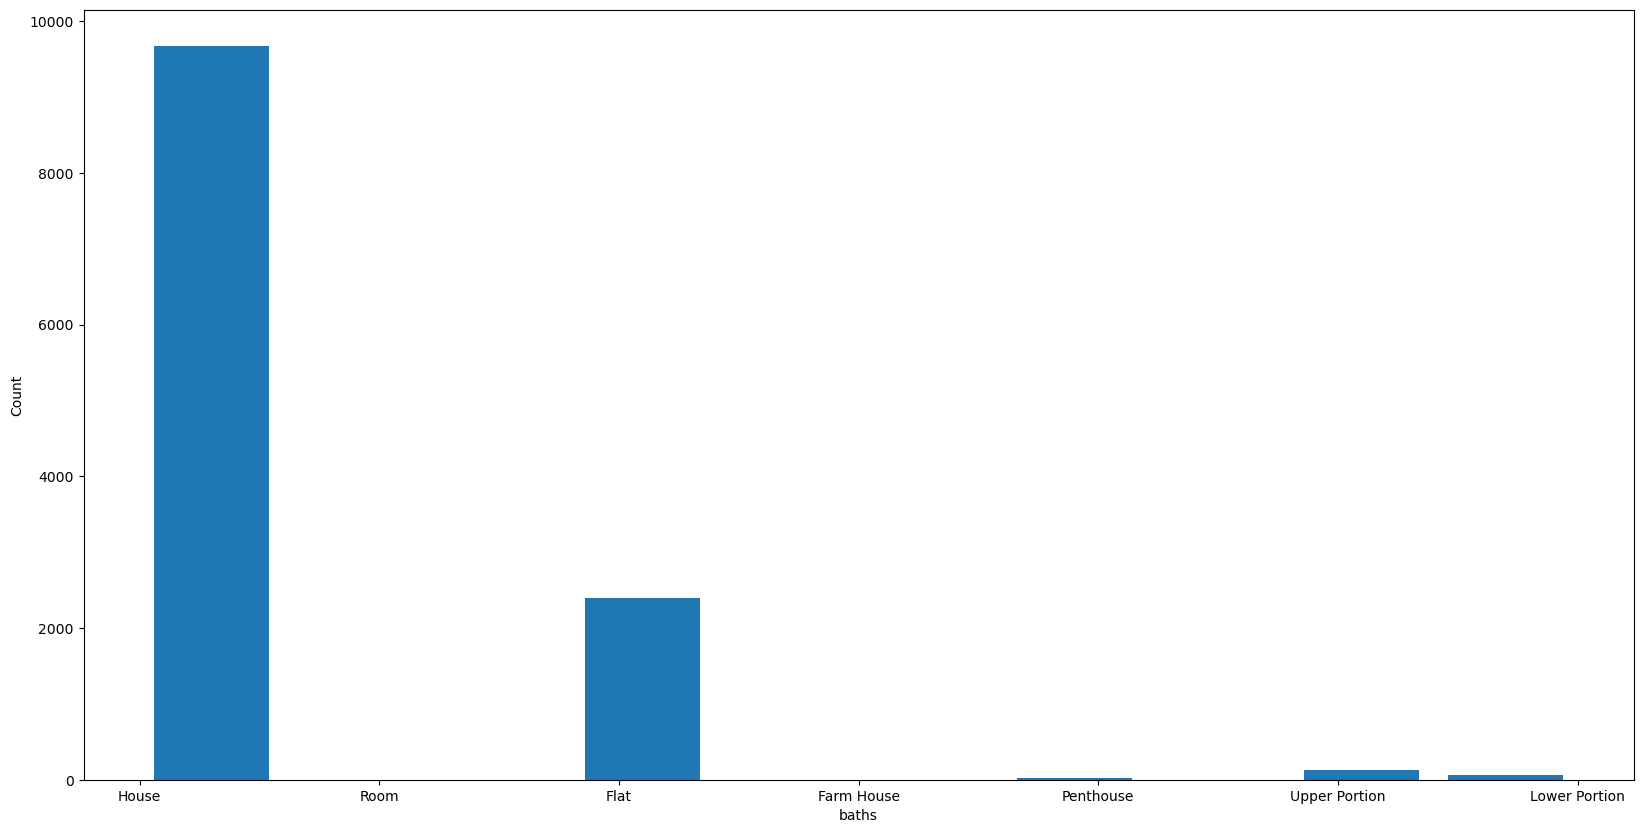

In [227]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data6.property_type,rwidth = 0.8)
plt.xlabel('baths')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

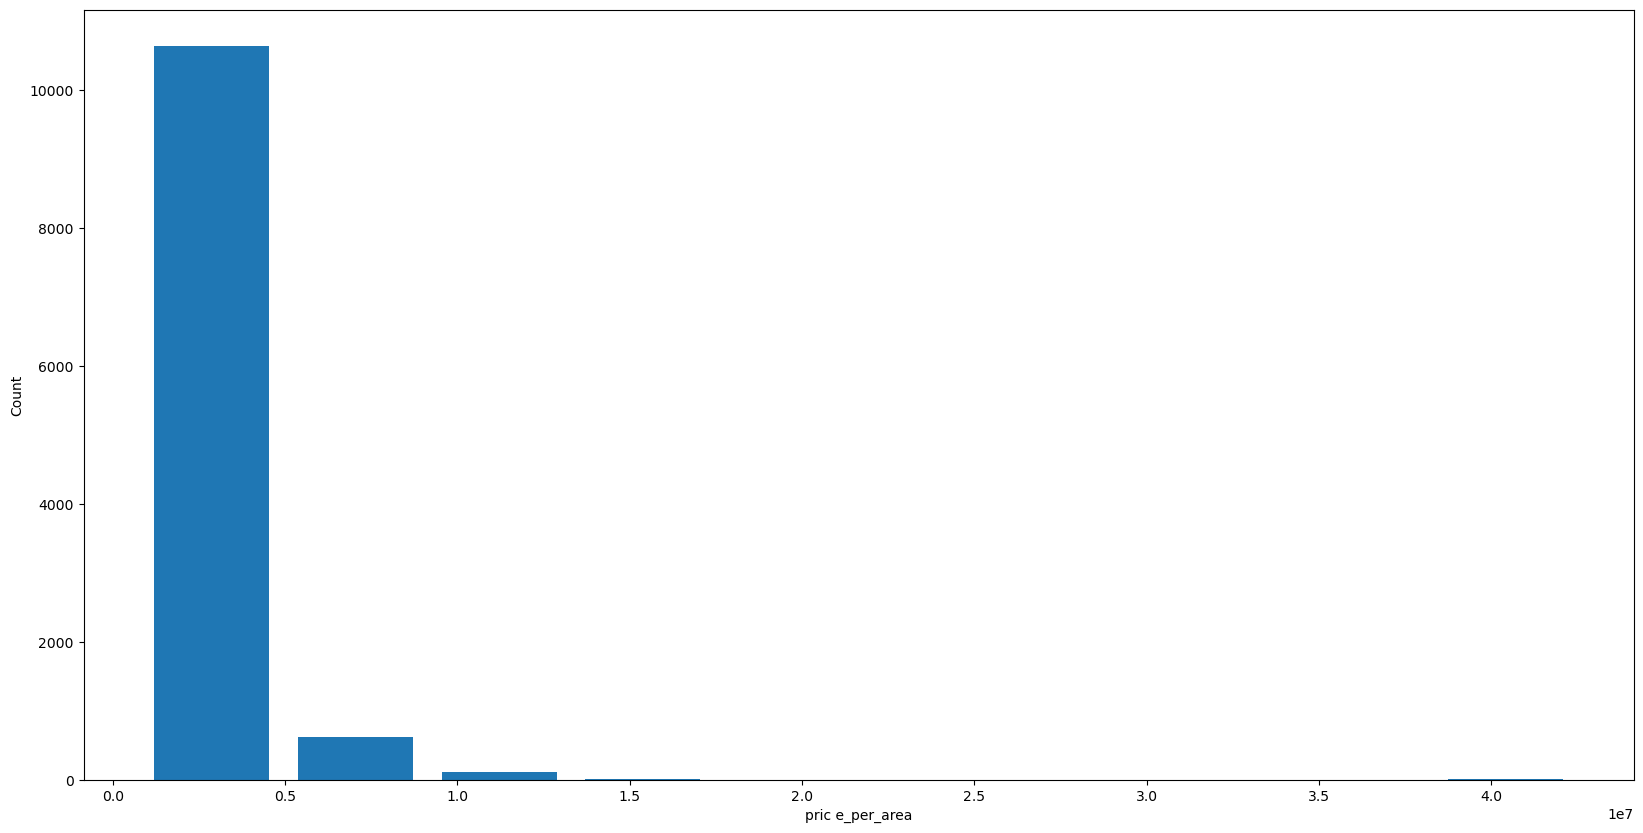

In [229]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data7.price_per_area,rwidth = 0.8)
plt.xlabel('pric e_per_area')
plt.ylabel('Count')

In [235]:
data7 = data6.drop(['price_per_area'],axis='columns')

In [239]:
data7.head()

,property_type,price,city,baths,bedrooms,Area_in_Marla
0,House,6000000,Faisalabad,2,4,2.5
1,House,7000000,Faisalabad,2,4,3.0
2,House,25000000,Faisalabad,5,4,10.0
3,House,40000000,Faisalabad,5,5,10.0
4,House,15000000,Faisalabad,5,6,4.0


In [253]:
dummies= pd.get_dummies(data7.city,dtype=float)
dummies.head(5)

,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [255]:
data8 = pd.concat([data7,dummies],axis = 'columns')
data8.head(5)

,property_type,price,city,baths,bedrooms,Area_in_Marla,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
0,House,6000000,Faisalabad,2,4,2.5,1.0,0.0,0.0,0.0,0.0
1,House,7000000,Faisalabad,2,4,3.0,1.0,0.0,0.0,0.0,0.0
2,House,25000000,Faisalabad,5,4,10.0,1.0,0.0,0.0,0.0,0.0
3,House,40000000,Faisalabad,5,5,10.0,1.0,0.0,0.0,0.0,0.0
4,House,15000000,Faisalabad,5,6,4.0,1.0,0.0,0.0,0.0,0.0


In [257]:
dummies_new = pd.get_dummies(data8.property_type,dtype=float)
dummies_new.head(5)

,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [261]:
data8 = pd.concat([data8,dummies_new],axis='columns')
data8.head(5)

,property_type,price,city,baths,bedrooms,Area_in_Marla,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,House,6000000,Faisalabad,2,4,2.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,House,7000000,Faisalabad,2,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,House,25000000,Faisalabad,5,4,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,House,40000000,Faisalabad,5,5,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,House,15000000,Faisalabad,5,6,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [273]:
data9 = data8.drop(['property_type','city'],axis='columns')
data9.head()

,price,baths,bedrooms,Area_in_Marla,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,6000000,2,4,2.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7000000,2,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25000000,5,4,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40000000,5,5,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,15000000,5,6,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [275]:
data9.shape

(12258, 16)

In [281]:
X = data9.drop('price',axis= 'columns')
X.head()

,baths,bedrooms,Area_in_Marla,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,2,4,2.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5,4,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5,5,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,6,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [283]:
y= data9.price
y.head()

0     6000000
1     7000000
2    25000000
3    40000000
4    15000000
Name: price, dtype: int64

In [285]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [287]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6748583971261799

In [289]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 0)
cross_val_score( LinearRegression(),X,y,cv=cv)

array([0.67579003, 0.69278725, 0.67945899, 0.65539646, 0.68037867])

In [295]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

def find_best_model_using_gridsearchcv(X, y):
    # Define the algorithms and their parameters
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'n_jobs': [None, -1]  # Removed 'normalize'
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }# Add more models if needed (e.g. decision tree, random forest, etc.)
    }

    # Initialize an empty list to store the results
    scores = []

    # Loop through each algorithm
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False)
        gs.fit(X, y)  # Fit the model using GridSearchCV

        # Append the best score and parameters to the results
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    # Return the results as a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function to find the best model
find_best_model_using_gridsearchcv(X, y)


C:\Users\Lahiru\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.776e+16, tolerance: 9.384e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lahiru\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+17, tolerance: 9.383e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lahiru\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+17, toler

,model,best_score,best_params
0,linear_regression,0.620342,"{'fit_intercept': False, 'n_jobs': None}"
1,lasso,0.557956,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.591863,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Test the model for few properties

In [308]:
def predict_price(city,Area_in_Marla,baths,bedrooms):    
    loc_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Area_in_Marla
    x[1] = baths
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [310]:
predict_price('Faisalabad',10, 2, 2)

C:\Users\Lahiru\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


7970446.245191901

In [312]:
import pickle
with open('House_price_prediction.pickle','wb') as f:
    pickle.dump(lr,f)